# Análise Exploratória De Dados: Menu Nutrition Dataset

Caderno de **Portifolio** <br/>
[Marcos Vinicius](https://www.linkedin.com/in/marcosvmanjos/) - [Github](https://github.com/marcos-anjos)

**Data From**: [Kaggle | Menu Nutrition Dataset](https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts)

---

### Tópicos

1. Introdução
3. Descrição dos Dados
4. Limpeza dos Dados
5. Análise Exploratória de Dados
6. Conclusão

### 1. Introdução

#### Definição do problema

O objetivo deste projeto é realizar uma análise exploratória dos dados do Menu Nutrition Dataset, disponível no Kaggle, a fim de entender a composição nutricional dos itens de menu de uma cadeia de fast food específica. Por meio dessa análise, buscamos identificar padrões, tendências e insights relevantes relacionados às características nutricionais dos alimentos oferecidos, como calorias, proteínas, gorduras, carboidratos, açúcares e sódio. O objetivo final é fornecer uma visão abrangente que possa auxiliar na tomada de decisões informadas pelos consumidores e na conscientização sobre escolhas alimentares saudáveis.

#### Dados

- **`Categoria do menu`**: A categoria a que pertence o item de menu específico.
- **`Itens do menu`**: A lista de todos os itens servidos
- **`Tamanho por dose`**: A quantidade (em g ou ml) de um determinado item de menu servido.
- **`Energia (kCal)`**: A quantidade de energia (kCal) por porção
- **`Proteína (g)`**: A quantidade de proteína (g) por porção
- **`Gordura total (g)`**: A quantidade de gordura total (g) por porção
- **`Gordura saturada (g)`**: A quantidade de gordura saturada (g) por porção
- **`Gorduras trans (g)`**: A quantidade de gordura trans (g) por porção
- **`Colesteróis (mg)`**: A quantidade de colestrol (mg) por porção
- **`Carboidratos (g)`**: A quantidade de hidratos de carbono (g) por porção
- **`Açúcares totais (g)`**: A quantidade de Açúcares totais (g) por porção
- **`Açúcares adicionados (g)`**: A quantidade de Açúcares adicionados (g) por porção
- **`Sódio (mg)`**: A quantidade de Sódio (mg) por porção

### 2. Descrição dos dados

In [4]:
# Importar as bibliotecas necessárias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
# Visualização do DataFrame
data = pd.read_csv('India_Menu.csv') 

In [3]:
# Lista dos tipos de dados de cada coluna no conjunto de dados
data.dtypes 

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [4]:
# Visualizar as primeiras 5 linhas do conjunto de dados
data.head() 

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [5]:
# Obter as dimensões do conjunto de dados
data.shape 

(141, 13)

In [6]:
# Obter uma visão geral das informações sobre o conjunto de dados
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [13]:
# O conjunto de dados contém 141 itens de menu para análise nutricional.
# Três características são categóricas: Categoria do menu, Itens do menu e Tamanho por dose. As demais características são numéricas.
# Um dado está faltando em relação ao sódio.

---

### 3. Limpeza dos Dados

In [4]:
# Calcular o número de valores nulos em cada coluna do conjunto de dados
data.isnull().sum() 

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [9]:
# Preenche os valores ausentes na coluna 'Sodium (mg)' com a média dos valores existentes nessa mesma coluna.
data['Sodium (mg)'].fillna(data['Sodium (mg)'].mean(), inplace=True) 

In [10]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [7]:
# Verificar valores duplicados em todo o DataFrame
valores_duplicados = data.duplicated().sum() 
print("Total de valores duplicados em todo o DataFrame:", valores_duplicados)

Total de valores duplicados em todo o DataFrame: 0


In [8]:
# Aplicar a função lambda para converter a coluna 'Per Serve Size' de categórica para numérica
data['Per Serve Size'] = data['Per Serve Size'].apply(lambda x: float(x.split()[0]))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    float64
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(11), object(2)
memory usage: 14.4+ KB


In [ ]:
# Preenchemos um valor nulo na coluna "Sodium (mg)" usando a média dos valores não nulos dessa coluna.
# Após a correção, não encontramos valores duplicados em todo o conjunto de dados.
# Converter a coluna 'Per Serve Size' de categórica para numérica é útil porque nos permite trabalhar com os valores de tamanho de porção de forma mais direta e eficiente durante a análise exploratória de dados.

---

### 4. Análise Exploratória de Dados

**Q1. Quais menus têm o maior e o menor número de itens?**

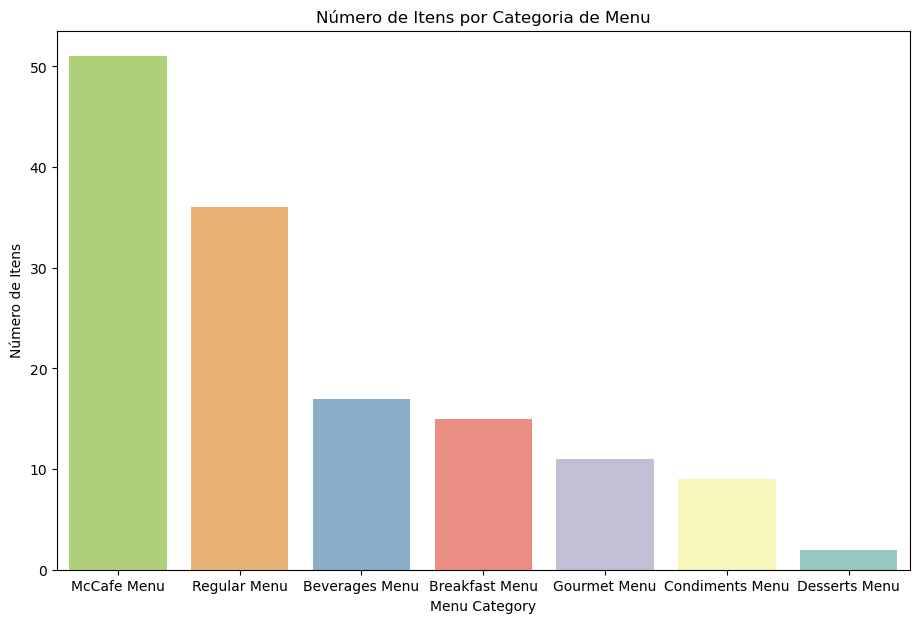

In [18]:
# Calcular o número de itens por categoria de menu
menu_counts = data['Menu Category'].value_counts()

# Plotar o número de itens por categoria de menu
plt.figure(figsize=(11, 7))
sns.barplot(x=menu_counts.index, y=menu_counts.values, palette='Set3', hue=menu_counts.values, legend=False)
plt.ylabel('Número de Itens')
plt.title('Número de Itens por Categoria de Menu')
plt.show()

**Q2. Cinco Itens por Menu com Maior Quantidade de Energy (kCal), Protein (g), Total fat (g), Sat Fat (g), Trans fat (g), Cholesterols (mg), Total carbohydrate(g), Total Sugars (g), Added Sugars (g), Sodium (mg).**

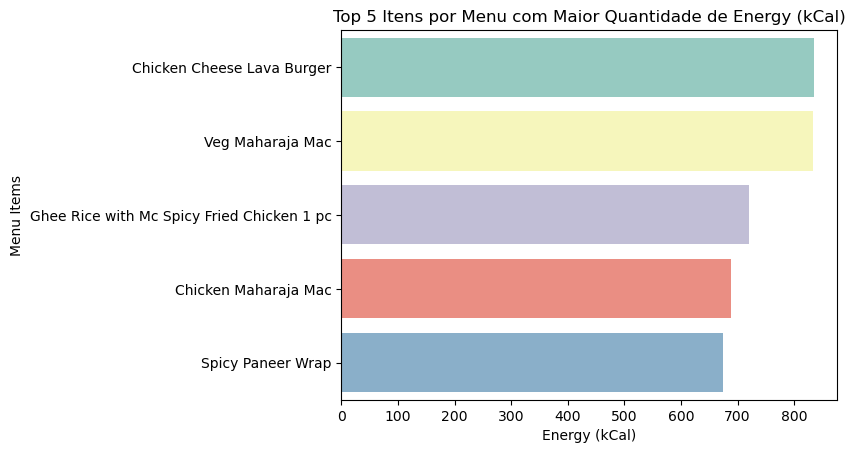

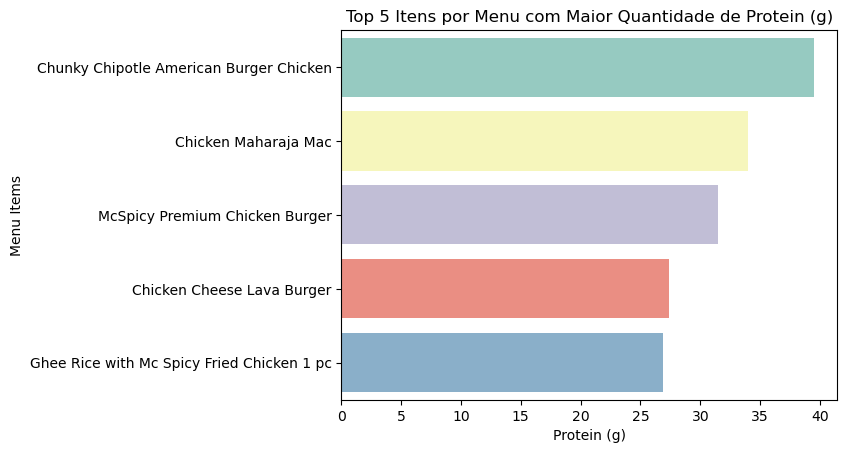

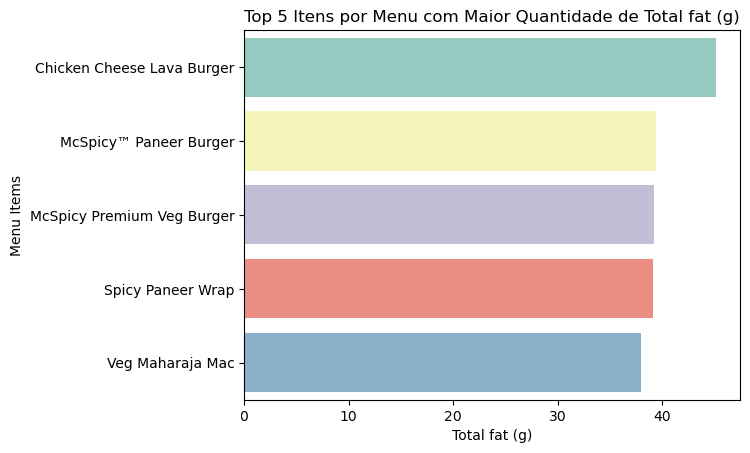

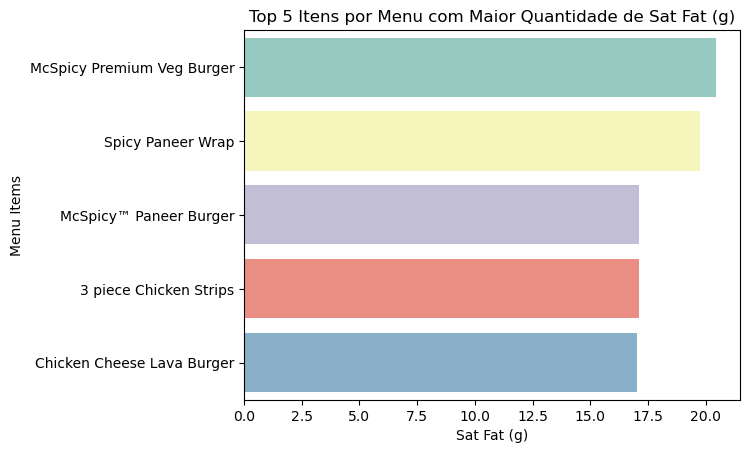

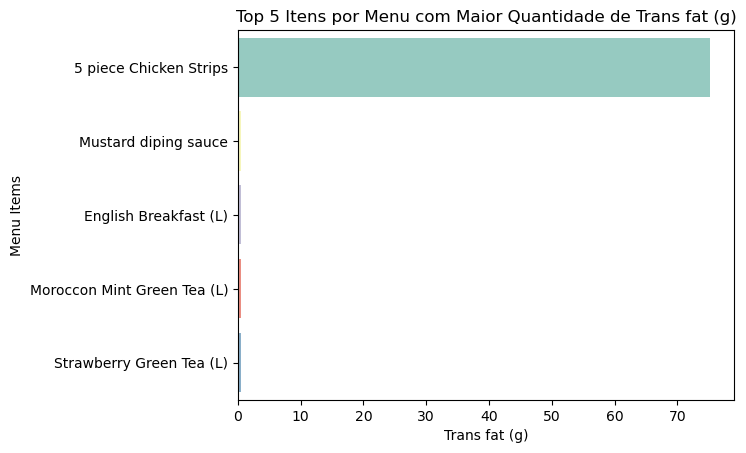

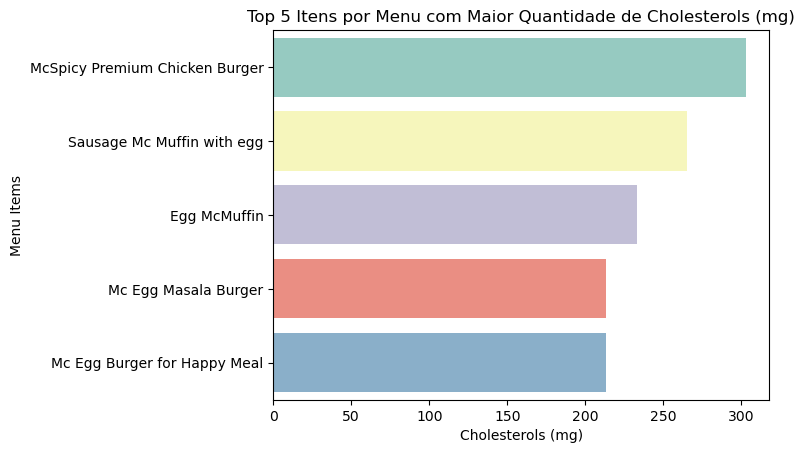

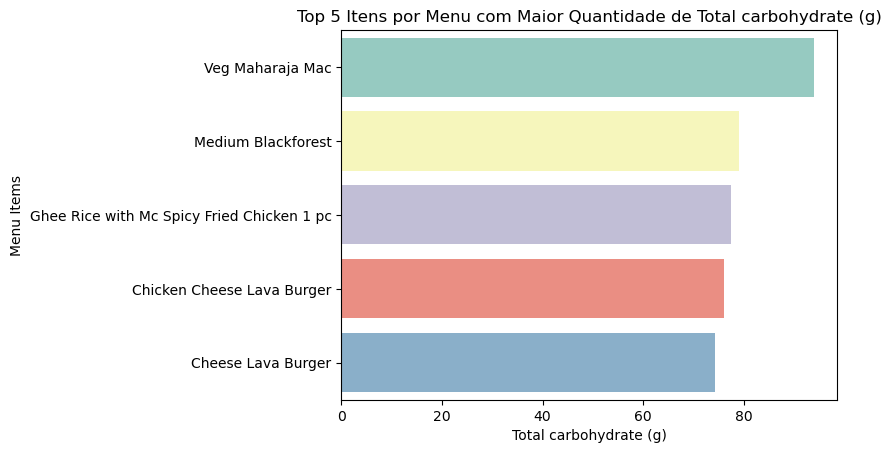

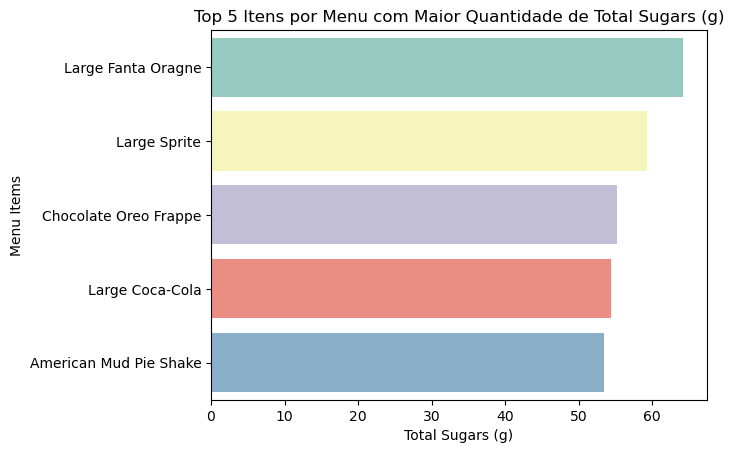

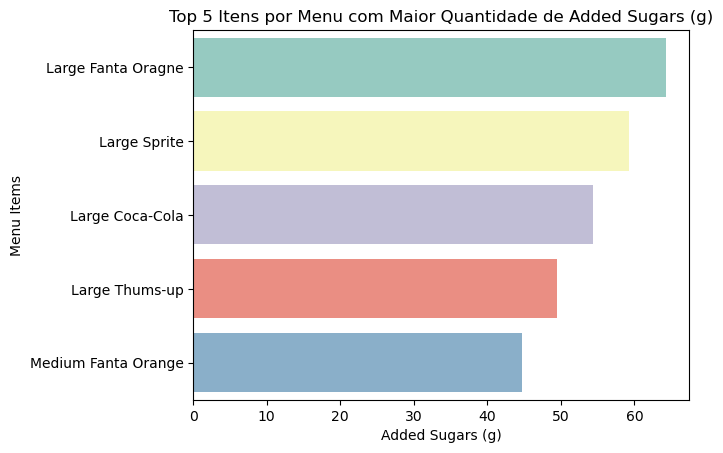

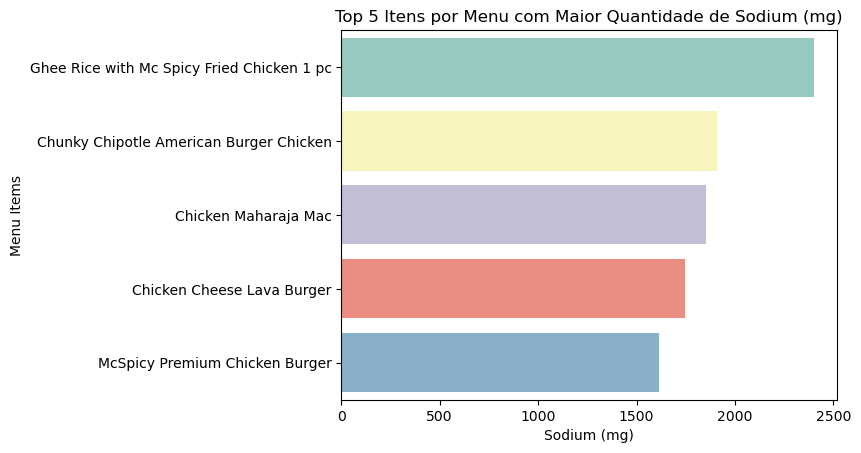

In [19]:
def plot_top_n_items(data, coluna, n=5):
    """
    Encontra e plota os top N itens com base em uma coluna especificada no conjunto de dados.
    
    Parâmetros:
        data (DataFrame): O DataFrame de entrada contendo os itens do menu e suas informações nutricionais.
        coluna (str): O nome da coluna pela qual encontrar os itens principais.
        n (int): O número de principais itens a serem encontrados e plotados. O padrão é 5.
    """
    # Encontra os top N itens com base na coluna especificada
    top_n_itens = data.nlargest(n, coluna)
    
    # Plota os top N itens em um gráfico de barras
    sns.barplot(x=coluna, y='Menu Items', data=top_n_itens, palette='Set3', hue='Menu Items', legend=False)
    plt.title(f'Top {n} Itens por Menu com Maior Quantidade de {coluna}')
    plt.show()

# Lista das colunas com valores nutricionais
colunas_nutricional = ['Energy (kCal)', 'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 
                     'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)', 
                     'Total Sugars (g)', 'Added Sugars (g)', 'Sodium (mg)']

# Função para plotar os top N itens para cada coluna de interesse
def plot_top_n_items_for_columns(data, colunas, n=5):
    for coluna in colunas:
        plot_top_n_items(data, coluna, n)

# Plotar os top 5 itens para cada coluna de interesse
plot_top_n_items_for_columns(data, colunas_nutricional, n=5)

**Q3. Como o teor de energia (em kCal) se relaciona com o teor de proteína (em gramas) nos itens do menu?** 

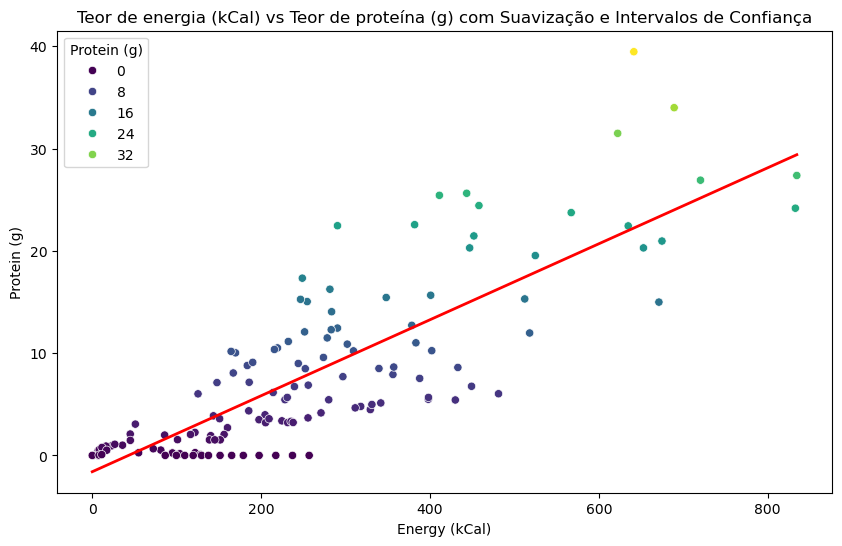

In [18]:
# Dividir os dados em grupos menores com base na categoria do menu
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Energy (kCal)',
    y='Protein (g)',
    hue='Protein (g)',
    data=data,
    palette='viridis'  
)
plt.title('Teor de energia (kCal) vs Teor de proteína (g) com Suavização e Intervalos de Confiança')
plt.xlabel('Teor de energia (kCal)')
plt.ylabel('Teor de proteína (g)')

# Adicionar uma linha de tendência ou curva de suavização
sns.regplot(
    x='Energy (kCal)',
    y='Protein (g)',
    data=data,
    scatter=False,  # Não mostrar pontos de dados no gráfico
    ci=None,       # Desativar intervalo de confiança
    line_kws={'color': 'red', 'linewidth': 2}  # Estilo da linha de tendência
)
plt.show()

**Q4. Quais são os itens do menu que oferecem a melhor relação entre calorias e nutrientes essenciais, como proteína, gordura e carboidratos?**

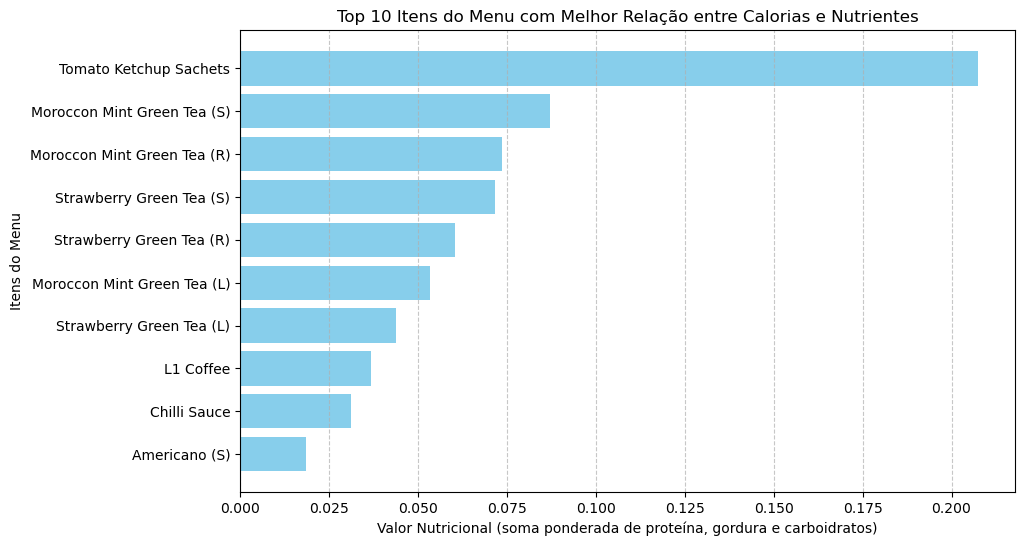

In [9]:
# Normalizar os valores de proteína, gordura e carboidratos
data['Protein (g)'] = data['Protein (g)'] / data['Energy (kCal)']
data['Total fat (g)'] = data['Total fat (g)'] / data['Energy (kCal)']
data['Total carbohydrate (g)'] = data['Total carbohydrate (g)'] / data['Energy (kCal)']

# Calcular a soma ponderada dos nutrientes essenciais
data['Nutritional Value'] = data['Protein (g)'] + data['Total fat (g)'] + data['Total carbohydrate (g)']

# Ordenar os itens do menu com base na métrica de valor nutricional
top_items = data.sort_values(by='Nutritional Value', ascending=False).head(10)

# Exibir os top 10 itens do menu com a melhor relação entre calorias e nutrientes
top_items[['Menu Items', 'Nutritional Value']]

# Definir os dados para o gráfico
top_items = data.sort_values(by='Nutritional Value', ascending=False).head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(top_items['Menu Items'], top_items['Nutritional Value'], color='skyblue')
plt.xlabel('Valor Nutricional (soma ponderada de proteína, gordura e carboidratos)')
plt.ylabel('Itens do Menu')
plt.title('Top 10 Itens do Menu com Melhor Relação entre Calorias e Nutrientes')
plt.gca().invert_yaxis()  # Inverter a ordem dos itens para mostrar o maior valor nutricional no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

**Q5. Existe alguma relação entre a quantidade de gordura saturada (em gramas) e a quantidade de colesterol (em miligramas) nos itens do menu?**

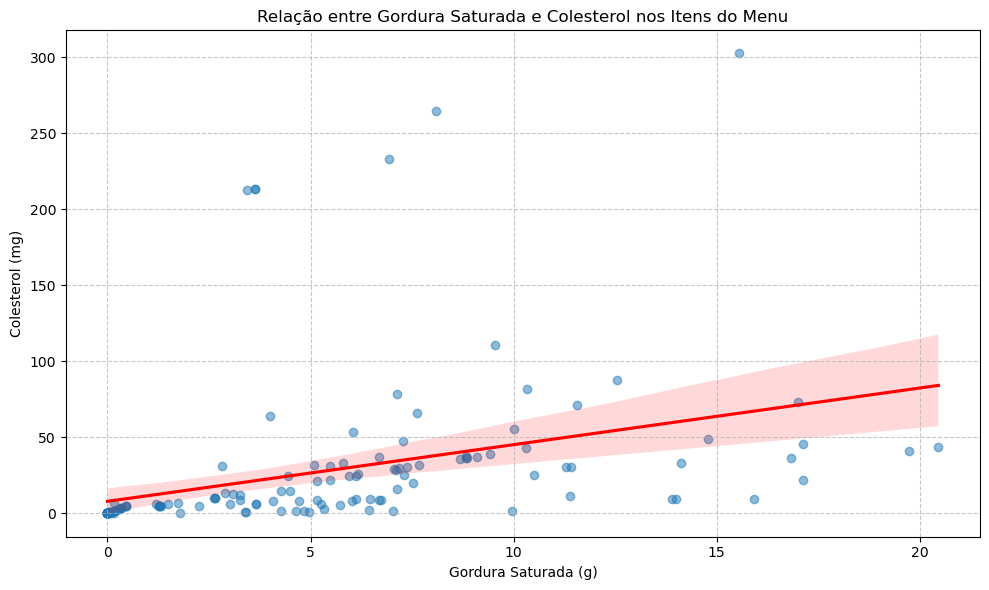

In [12]:
# Plotar um gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='Sat Fat (g)', y='Cholesterols (mg)', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relação entre Gordura Saturada e Colesterol nos Itens do Menu')
plt.xlabel('Gordura Saturada (g)')
plt.ylabel('Colesterol (mg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Q6. Como o teor de carboidratos (em gramas) varia entre os diferentes tipos de menu (Regular, McCafe, Gourmet, etc.)?**

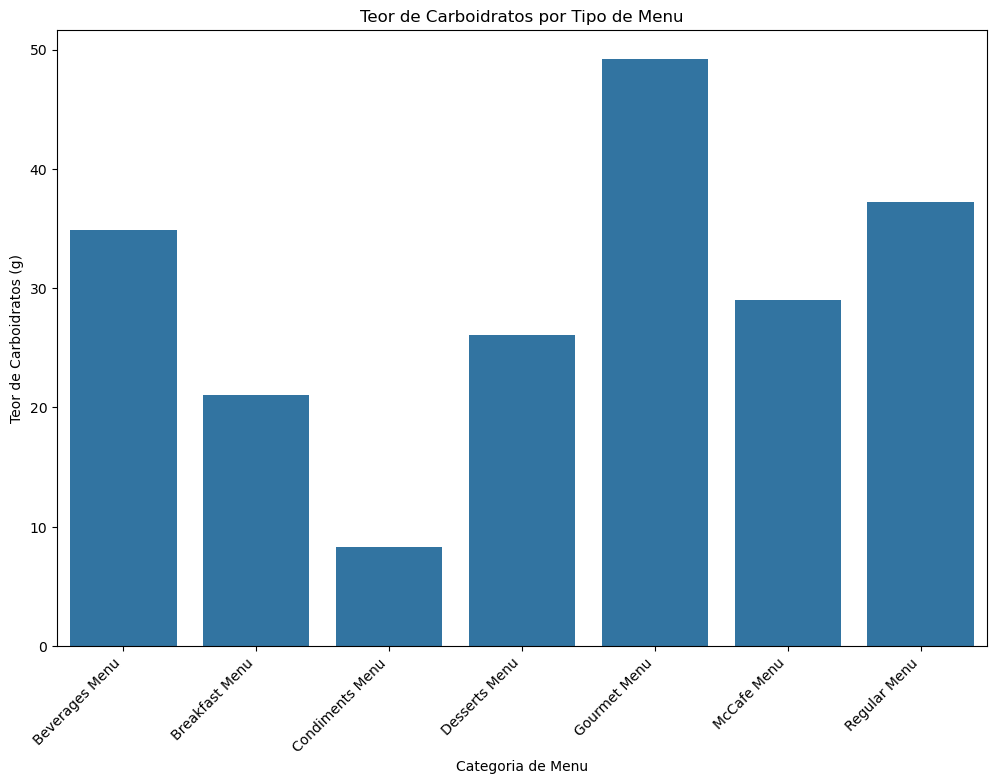

In [16]:
# Calcular a média do teor de carboidratos por tipo de menu
carb_by_category = data.groupby('Menu Category')['Total carbohydrate (g)'].mean()  

# Plotar um gráfico de barras agrupado
plt.figure(figsize=(12, 8))
sns.barplot(x=carb_by_category.index, y=carb_by_category.values)
plt.xlabel('Categoria de Menu')
plt.ylabel('Teor de Carboidratos (g)')
plt.title('Teor de Carboidratos por Tipo de Menu')
plt.xticks(rotation=45, ha='right')
plt.show()

**Q7. Qual é a distribuição do teor de sódio (em miligramas) nos diferentes tipos de menu?**

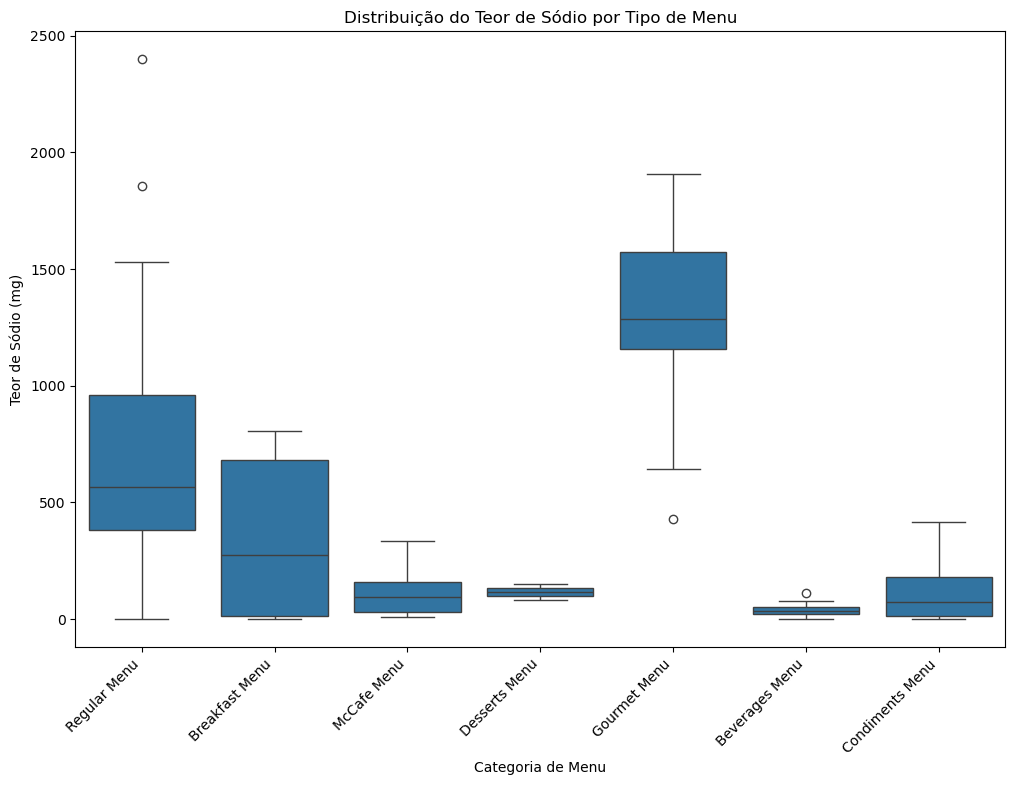

In [17]:
# Plotar um boxplot do teor de sódio por tipo de menu
plt.figure(figsize=(12, 8))
sns.boxplot(x='Menu Category', y='Sodium (mg)', data=data)
plt.xlabel('Categoria de Menu')
plt.ylabel('Teor de Sódio (mg)')
plt.title('Distribuição do Teor de Sódio por Tipo de Menu')
plt.xticks(rotation=45, ha='right')
plt.show()

**Q8. Como as diferentes variáveis numéricas estão correlacionadas entre si no conjunto de dados?**

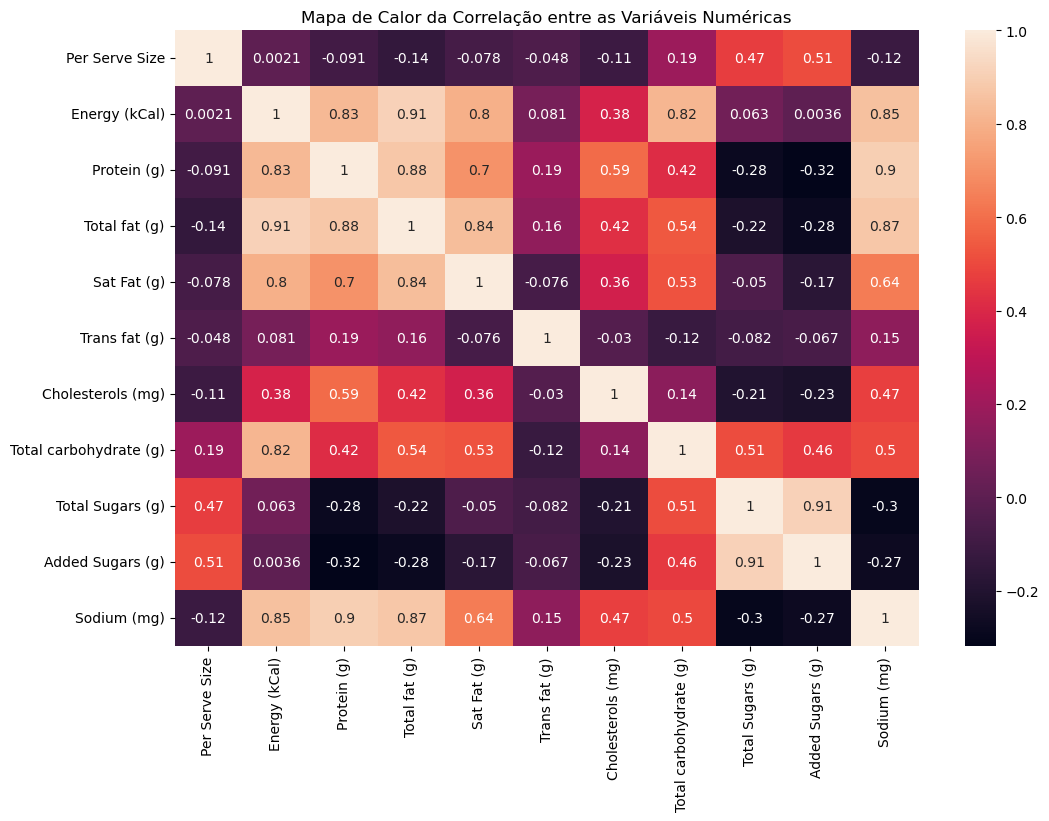

In [10]:
# Selecionar apenas as colunas numéricas
numeric_data = data.select_dtypes(include='number')

# Criar o gráfico de mapa de calor da correlação
plt.figure(figsize=(12, 8))
sns.heatmap(data=numeric_data.corr(), annot=True)
plt.title('Mapa de Calor da Correlação entre as Variáveis Numéricas')
plt.show()

  **Q9. Existe alguma relação entre o tamanho da porção e o teor de colesterol nos itens do menu?**

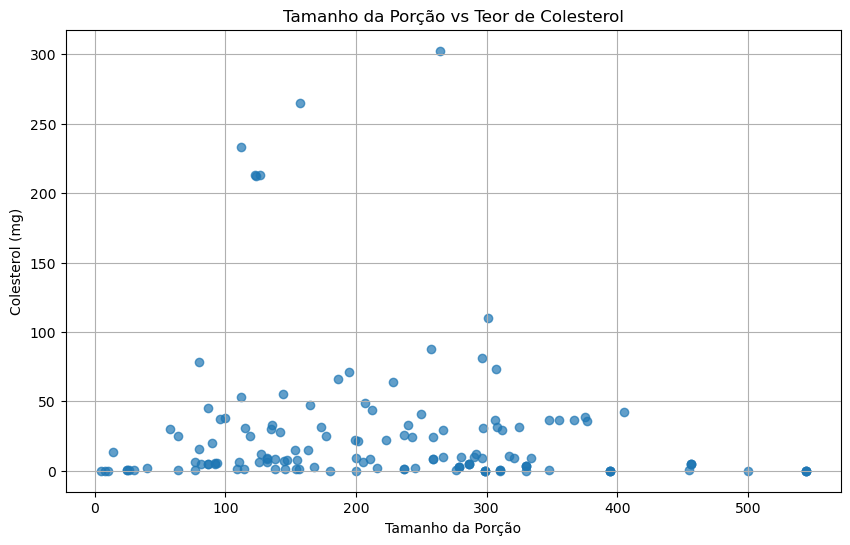

In [24]:
# Plotar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data['Per Serve Size'], data['Cholesterols (mg)'], alpha=0.7)
plt.title('Tamanho da Porção vs Teor de Colesterol')
plt.xlabel('Tamanho da Porção')
plt.ylabel('Colesterol (mg)')
plt.grid(True)
plt.show()

  **Q10. Há alguma categoria específica de menu que apresenta uma relação mais forte entre tamanho da porção e teor de colesterol?**

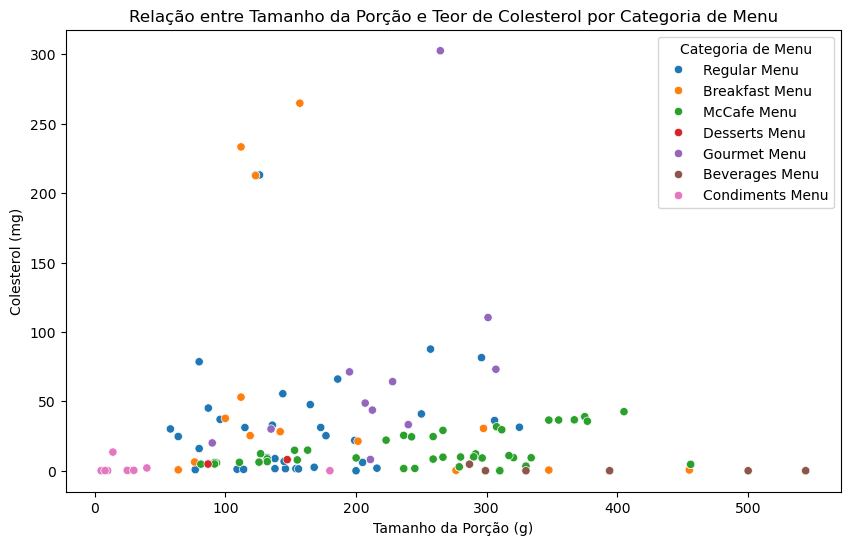

In [31]:
# Gráfico de dispersão com diferentes cores para cada categoria de menu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Per Serve Size', y='Cholesterols (mg)', hue='Menu Category', data=data)
plt.title('Relação entre Tamanho da Porção e Teor de Colesterol por Categoria de Menu')
plt.xlabel('Tamanho da Porção (g)')
plt.ylabel('Colesterol (mg)')
plt.legend(title='Categoria de Menu')
plt.show()

### 5. Conclusão